In [1]:
#import statements
%matplotlib inline
import matplotlib.pyplot as plt
import os
import scipy.io
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import matplotlib.patches as patches
from matplotlib.path import Path
import scipy
from scipy import ndimage
import scipy.misc as im

In [272]:
#given functions
def load_dino(mat_file='files/dino2.mat'):
	# Load dino matrix file contents
	dino_mat = scipy.io.loadmat(mat_file)
	dino_01 = np.array(dino_mat['dino01'])
	dino_02 = np.array(dino_mat['dino02'])
	cor_01 = np.array(dino_mat['cor1'])
	cor_02 = np.array(dino_mat['cor2'])
	return dino_01, dino_02, cor_01, cor_02

def draw_points(img, points):
	# Plot points on image
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')
    for elem in points:
        circ = Circle((elem[0], elem[1]),10)
        ax.add_patch(circ)
    plt.show()

def draw_correspondence(img1, img2, cor1, cor2):    
    # Pad images if unequal size
    offset = img1.shape[0] - img2.shape[0]
    img_shift = img1.shape[1]
    top1 = 0
    top2 = 0
    if offset > 0:
        top2 = offset
    elif offset < 0:
        top1 = abs(offset)

    # TODO: if you don't have OpenCV, please use PIL or other 
    # simple techniques to pad small image on the top to make equal
    # height
    #new_img1 = cv2.copyMakeBorder(img1,top1,0,0,0,1,0) 
    #new_img2 = cv2.copyMakeBorder(img2,top2,0,0,0,1,0)
    new_img1 = img1
    new_img2 = img2
    
    # Stack images horizontally
    stack_img = np.hstack((new_img1, new_img2))
    
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    ax.imshow(stack_img, cmap='gray')
    codes = [Path.MOVETO,Path.LINETO]

    # Plot points and lines
    for elem in cor1:
        circ = Circle((elem[0], elem[1]+top1),10)
        ax.add_patch(circ)

    for elem in cor2:
        circ = Circle((elem[0]+img_shift, elem[1]+top2),10)
        ax.add_patch(circ)
    
    # To be used for plotting correspondance lines 
    # Not to be used for plotting Epipolar lines. Use 
    # draw_lines instead
    codes = [Path.MOVETO,Path.LINETO]
    for elem1, elem2 in zip(cor1, cor2):
        verts = [(elem1[0], elem1[1]+top1), (elem2[0]+img_shift, elem2[1]+top2)]
        path = Path(verts, codes)
        ax.add_patch(patches.PathPatch(path, color='green', lw=2.0))
    plt.show()

def draw_lines(img1, points1, img2, lines):
    # Use for plotting epipolar lines
    fig = plt.figure(figsize=(20,10))
    ax1, ax2 = fig.add_subplot(1, 2, 1), fig.add_subplot(1, 2, 2)

    # Plot points on img1
    ax1.imshow(img1, cmap='gray')
    for elem in points1:
        circ = Circle((elem[0], elem[1]),10)
        ax1.add_patch(circ)

    # Plot corresponding Epipolar lines on img2
    ax2.imshow(img2, cmap='gray')
    codes = [Path.MOVETO,Path.LINETO]
    for line in lines:
        slope = -1*line[0]/line[1]
        intercept = -1*line[2]/line[1]
        verts = [(0, slope*0+intercept), 
                 (img2.shape[1], slope*(img2.shape[1])+intercept)]
        path = Path(verts, codes)
        ax2.add_patch(patches.PathPatch(path, color='green', lw=2.0))
    plt.show()

# 1: Corner Detection


In [3]:
#load dinosaur image and filter:
dino1, dino2, cor1, cor2 = load_dino()

## Functions used for part 1

In [114]:
def grayscale(img):
    return np.dot(img[...,:3], [0.299, 0.587, 0.114])

#2d-gaussian function, helper function for gaussian filter:
def xy_gaussian(x,y,sig):
    
    #compute gaussian:
    g = (1.0 / (2 * math.pi * sig**2))*math.exp(-((x**2)+y**2)/(2*sig**2))
    return g
    
#gaussian filter function:
def gaussian_filter(sigma):
    
    #initialize output matrix:
    M = []
    
    #loop in range -3sigma -> +3sigma
    for x in range(-3*sigma, 3*sigma+1):
        item = []
        for y in range(-3*sigma, 3*sigma+1):
            item.append(xy_gaussian(x,y,sigma))
        M.append(item)
    
    return M

def plot_gaussian():
    
    img1 = gaussian_filter(1)
    img2 = gaussian_filter(3)
    img3 = gaussian_filter(5)
    
    #plot the kernels
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(131)
    ax1.set_title("sigma = 1")
    ax2 = fig.add_subplot(132)
    ax2.set_title("sigma = 3")
    ax3 = fig.add_subplot(133)
    ax3.set_title("sigma = 5")

    #show images
    ax1.imshow(img1, cmap='gray')
    ax2.imshow(img2, cmap='gray')
    ax3.imshow(img3, cmap='gray')
    
    plt.show()

#apply a gaussian filter to an image to smooth it out
def smooth_image(img, sigma):
    
    #convert image to grayscale:
    gray = grayscale(img)
    
    #create filter of a certain sigma value:
    filt = gaussian_filter(sigma)

    #correlate the image with this filter:
    smooth = ndimage.filters.correlate(gray, filt)
    
    return smooth

def plot_smooth(img):
    
    img1 = smooth_image(img, 1)
    img2 = smooth_image(img, 3)
    img3 = smooth_image(img, 5)
    
    #time to plot these gradients:
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(131)
    ax1.set_title("sigma = 1")
    ax2 = fig.add_subplot(132)
    ax2.set_title("sigma = 3")
    ax3 = fig.add_subplot(133)
    ax3.set_title("sigma = 5")

    #show images
    ax1.imshow(img1, cmap='gray')
    ax2.imshow(img2, cmap='gray')
    ax3.imshow(img3, cmap='gray')
    
    plt.show()

#compute gradient given an image and a direction 
def gradient(img, direction):
    
    #initialize filters:
    x_filt = [[-0.5, 0.0, 0.5]]
    y_filt =[[-0.5], [0.0], [0.5]]
    
    #compute x gradient:
    if direction == 'x':
        return ndimage.filters.correlate(img, x_filt)
        
    elif direction == 'y':
        return ndimage.filters.correlate(img, y_filt)
    
#starting from raw image compute the gradient in a certain direction:
def compute_gradients_raw(raw, sig, direction):
    
    smoo = smooth_image(raw, sig)
    G = gradient(smoo, direction)
    
    return G

#function to plot gradients for report output:
def plot_gradients(my_image):
    
    #compute gradients for sigma = 1, 3, 5 in x and y direction
    img1x = compute_gradients_raw(my_image, 1, 'x')
    img1y = compute_gradients_raw(my_image, 1, 'y')
    img3x = compute_gradients_raw(my_image, 3, 'x')
    img3y = compute_gradients_raw(my_image, 3, 'y')
    img5x = compute_gradients_raw(my_image, 5, 'x')
    img5y = compute_gradients_raw(my_image, 5, 'y')
    
    #time to plot these gradients:
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(321)
    ax1.set_title("sigma = 1, x gradient")
    ax2 = fig.add_subplot(322)
    ax2.set_title("sigma = 1, y gradient")
    ax3 = fig.add_subplot(323)
    ax3.set_title("sigma = 3, x gradient")
    ax4 = fig.add_subplot(324)
    ax4.set_title("sigma = 3, y gradient")
    ax5 = fig.add_subplot(325)
    ax5.set_title("sigma = 5, x gradient")
    ax6 = fig.add_subplot(326)
    ax6.set_title("sigma = 5, y gradient")

    #show images
    ax1.imshow(img1x, cmap='gray')
    ax2.imshow(img1y, cmap='gray')
    ax3.imshow(img3x, cmap='gray')
    ax4.imshow(img3y, cmap='gray')
    ax5.imshow(img5x, cmap='gray')
    ax6.imshow(img5y, cmap='gray')

    plt.show()
    plt.savefig('/Users/fairliek/Documents/SP17/CSE152/hw4/files/dino_gradients.png')
    
#function to pad image with zeroes +- 3 sigma:
def pad_image(img, sig):
    
    #initialize new image for output:
    padded = []
    
    #loop through the input image with an extra +-3sigma window
    for i in range(-3*sig, len(img) + 3*sig):
        row = []
        for j in range(-3*sig, len(img[0]) + 3*sig):
            
            #pad with zeroes if we are out of range of the image:
            if i < 0 or j < 0 or i >= len(img) or j >= len(img[0]):
                row.append(0.0)
            else:
                row.append(img[i][j])
        
        padded.append(row)
    
    return padded

# function to score each pixel in an image as a possible corner:
def score_corners(raw_img, sigma):
    
    #compute gradients in x and y directions:
    x_gradient = compute_gradients_raw(raw_img, sigma, 'x')
    y_gradient = compute_gradients_raw(raw_img, sigma, 'y')
    
    #pad the gradient images:
    x_pad = pad_image(x_gradient, sigma)
    y_pad = pad_image(y_gradient, sigma)
    
    #initialize matrix to keep pixel scores and locations
    scores = []
    
    #loop through padded gradients to compute scores for each pixel:
    print("loop boundaries:", len(x_pad), len(x_pad[0]))
    scores_matrix = []
    for i in range(3*sigma, len(x_pad) - 3*sigma):
        row = []
        for j in range(3*sigma, len(x_pad[0])-3*sigma):
            
            #compute matrix C for this pixel:
            C = [[0.0, 0.0], \
                 [0.0, 0.0]]
            
            for x in range(i-3*sigma, i+3*sigma):
                for y in range(j-3*sigma, j+3*sigma):
                    
                    #update values in C matrix:
                    C[0][0] += x_pad[x][y]**2
                    C[0][1] += x_pad[x][y]*y_pad[x][y]
                    C[1][0] = C[0][1]
                    C[1][1] += y_pad[x][y]**2
            
            #compute eigenvalues of C
            eigenvalues = np.linalg.eig(C)[0]
            
            #get minor eigenvalue:
            minor = min(eigenvalues)
            
            #update scores list:
            scores.append([minor, i-3*sigma, j-3*sigma])
            row.append(minor)
        scores_matrix.append(row)
    
    return scores, scores_matrix

#function to find all pixels that could be corners:
def find_corners(scores_matrix, n):
    
    candidates = []
    
    for i in range(1, len(scores_matrix)-1):
        for j in range(1, len(scores_matrix[i])-1):
            
            #check if score of this pixel is greater than that of its neighbors
            neighbors = [scores_matrix[i-1][j-1], scores_matrix[i-1][j], scores_matrix[i-1][j+1], \
                         scores_matrix[i][j-1], scores_matrix[i][j+1], \
                         scores_matrix[i+1][j-1], scores_matrix[i+1][j], scores_matrix[i+1][j+1]]
            
            if scores_matrix[i][j] > max(neighbors):
                candidates.append([scores_matrix[i][j], i, j])
    
    #get the top n corner candidates:
    candidates.sort(key=lambda x: x[0])
    sorted_candidates = candidates[::-1]
    
    return sorted_candidates[:n]
    

# 1.1 Image gradients

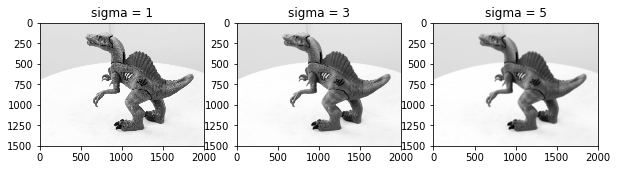

In [115]:
plot_smooth(dino1)

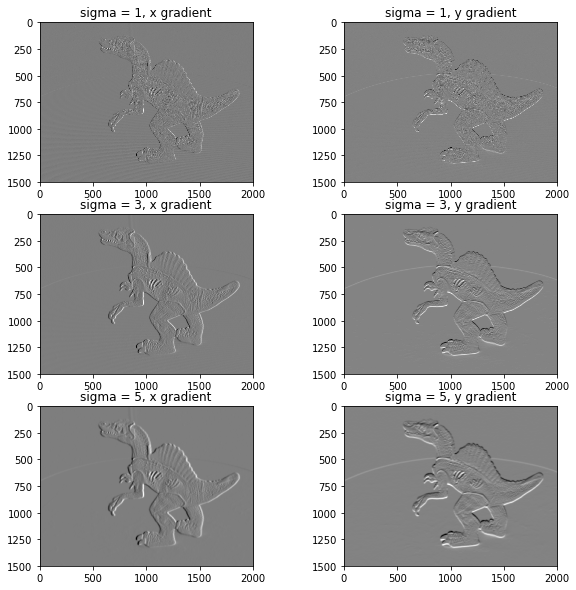

In [5]:
plot_gradients(dino1)

# 1.2 Find corners

In [111]:
#try scoring function on a small image:
smol_dino = im.imresize(dino1, (300, 400))
my_scores, my_scores_matrix = score_corners(smol_dino, 3)
top_corners = find_corners(my_scores_matrix, 50)

loop boundaries: 318 418


In [109]:
big_scores, big_scores_matrix = score_corners(dino1, 3)

loop boundaries: 1518 2018


In [126]:
dino2_scores, dino2_scores_matrix = score_corners(dino2, 3)

loop boundaries: 1468 1918


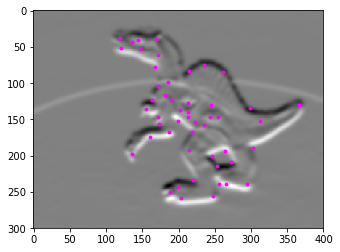

In [107]:
#sort my_scores:

#get top n x,y values of highest scoring pixels:

X = []
Y = []
for i in range(len(top_corners)):
    X.append(top_corners[i][1])
    Y.append(top_corners[i][2])

smolg = compute_gradients_raw(smol_dino, 3, 'y')
plt.scatter(Y,X,s=8, c='magenta')
plt.imshow(smolg, cmap='gray')



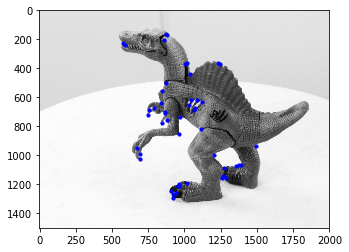

In [125]:
big_corners = find_corners(big_scores_matrix, 50)

#get top n x,y values of highest scoring pixels:

big_X = []
big_Y = []
for i in range(len(big_corners)):
    big_X.append(big_corners[i][1])
    big_Y.append(big_corners[i][2])


bigg = compute_gradients_raw(dino1, 3, 'y')
plt.scatter(big_Y,big_X,s=10, c='blue')
plt.imshow(grayscale(dino1), cmap='gray')

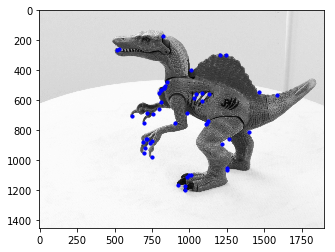

In [128]:
dino2_corners = find_corners(dino2_scores_matrix, 50)

#get top n x,y values of highest scoring pixels:

dino2_X = []
dino2_Y = []
for i in range(len(dino2_corners)):
    dino2_X.append(dino2_corners[i][1])
    dino2_Y.append(dino2_corners[i][2])


dino2_g = compute_gradients_raw(dino1, 3, 'y')
plt.scatter(dino2_Y,dino2_X,s=10, c='blue')
plt.imshow(grayscale(dino2), cmap='gray')

# 2: Sparse Stereo Correspondences

## Functions for part 2

In [333]:
#helper funtcion that computes average of a patch, for computing NSSD
def patch_average(patch):
    
    total = 0.0
    
    #sum pixel values in the image
    for i in range(len(patch)):
        for j in range(len(patch[i])):
            total += patch[i][j]
    
    #compute average
    n = i * j
    av = total / n
    return av

#helper function that computes variance of a patch, for computing NSSD
def patch_variance(patch, av):
    
    #sum of squared differences (P(i,j) - av)**2
    ssd = 0.0
    
    #compute ssd
    for i in range(len(patch)):
        for j in range(len(patch[i])):
            
            ssd += (patch[i][j] - av)**2 
    
    #compute variance
    n = i*j
    ssd = ssd / n
    var = math.sqrt(ssd)
    return var

#compute NSSD between two patches:
def patch_NSSD(patch1, patch2):
    
    #initialize NSSD:
    NSSD = 0.0
    
    #compute average and variance for each patch:
    patch1_average = patch_average(patch1)
    patch2_average = patch_average(patch2)
    patch1_variance = patch_variance(patch1, patch1_average)
    patch2_variance = patch_variance(patch2, patch2_average)
    
    #loop through each pixel in the patch:
    for i in range(len(patch1)):
        for j in range(len(patch1[i])):
            
            p1 = (patch1[i][j] - patch1_average) / patch1_variance
            p2 = (patch2[i][j] - patch2_average) / patch2_variance
            
            sq_diff = (p1 - p2)**2
            
            NSSD += sq_diff
    
    return NSSD

#get 9x9 patches in an image from corners (a list of x,y coordinates):
def get_patches(img, corners, size):
    
    #initialize list of patches:
    patches = []
    
    #make a 9x9 patch for each corner
    for corner in corners:
        
        #check if this corner is within valid boundaries:
        if corner[0] - size >= 0 and corner[0] + size < len(img) and corner[1] - size >= 0 and corner[1] + size < len(img[0]):
            
            patch = []
            
            #make a 9x9 patch from this corner
            for i in range(corner[0] - int(size/2), corner[0] + int(size/2)+1):
                row = []
                for j in range(corner[1] - int(size/2), corner[1] + int(size/2)+1):
                    row.append(img[i][j])
                    
                patch.append(row)
                
            patches.append(patch)
    
    return patches

#compute NSSD for each patch in img1 against each patch in img2:
#input non-grayscaled images
def get_corresponding_corners(img1, img2, corners1, corners2, thresh, ratio, patch_size):
    
    #store correspondences for img1 and img2 separately:
    corr1 = []
    corr2 = []
    
    #get patches for img1 and img2:
    img1_patches = get_patches(img1, corners1, patch_size)
    img2_patches = get_patches(img2, corners2, patch_size)
    
    #get correspondences for img1:
    for i in range(len(img1_patches)):
        item = [[corners1[i][0], corners1[i][1]]]
        for j in range(len(img2_patches)):
            
            #compute NSSD
            NSSD = patch_NSSD(img1_patches[i], img2_patches[j])
            
            #add to list of correspondences if NSSD < thresh
            if NSSD < thresh:
                element = [corners2[j][0], corners2[j][1], NSSD]
                item.append(element)
                
        corr1.append(item)
    
    #get correspondences for img2:
    for i in range(len(img2_patches)):
        item = [[corners2[i][0], corners2[i][1]]]
        for j in range(len(img1_patches)):
        
            #compute NSSD:
            NSSD = patch_NSSD(img2_patches[i], img1_patches[j])

            #add to list of correspondences is NSSD < thresh
            if NSSD < thresh:
                element = [corners1[j][0], corners1[j][1], NSSD]
                item.append(element)
        
        corr2.append(item)
    
    #sort corr1 and corr2 by NSSD scores:
    sorted_corr1 = []
    sorted_corr2 = []
    
    for item in corr1:
        sub = item[1:]
        sub.sort(key = lambda x: x[2])
        
        #not sure if this is right
        sub = [item[0]] + sub
        sorted_corr1.append(sub)
    
    for item in corr2:
        sub = item[1:]
        sub.sort(key = lambda x: x[2])
        
        #not sure if this is right
        sub = [item[0]] + sub
        sorted_corr2.append(sub)
    
    #filter out points based on the ratio constraint:
    filtered_corr1 = []
    filtered_corr2 = []
    
    for item in sorted_corr1:
        
        #compute ratio between top hit and second top hit:
        if len(item) > 2:
            rat1 = item[1][2] / item[2][2]

            #keep if computed ratio is below ratio threshold:
            if rat1 < ratio:
                l = [item[0], [item[1][0], item[1][1]]]
                filtered_corr1.append(l)
    
    for item in sorted_corr2:
        
        #compute ratio between top hit and second top hit:
        if len(item) > 2:
            rat2 = item[1][2] / item[2][2]

            #keep if computed ratio is below ratio threshold:
            if rat2 < ratio:
                l = [item[0], [item[1][0], item[1][1]]]
                filtered_corr2.append(l)
    
    #put coordinates into a list for img1 and for img2:
    img1_out = []
    img2_out = []
    
    
    for item in filtered_corr1:
        img1_out.append(item[0])
        img2_out.append(item[1])
    
    
    for item in filtered_corr2:
        img1_out.append(item[0])
        img2_out.append(item[1])
    
    
    #return sorted, fitlered correspondences
    return filtered_corr1, filtered_corr2

#helper function to reformat corners as a list of x,y coordinates:
def reformat_corners(corners):
    
    ref = []
    for corner in corners:
        ref.append([corner[1], corner[2]])
    
    return ref

In [226]:
d1_corners = []
d2_corners = []

for item in big_corners:
    d1_corners.append([item[1], item[2]])

for item in dino2_corners:
    d2_corners.append([item[1], item[2]])
    

50
50


In [582]:
c1, c2 = get_corresponding_corners(grayscale(dino1), grayscale(dino2), d1_corners, d2_corners, 400, 1, 15)

In [583]:
dino1_pairs = []
dino2_pairs = []

for pair in c1:
    dino1_pairs.append(pair[0][::-1])
    dino2_pairs.append(pair[1][::-1])

50 50
50 50


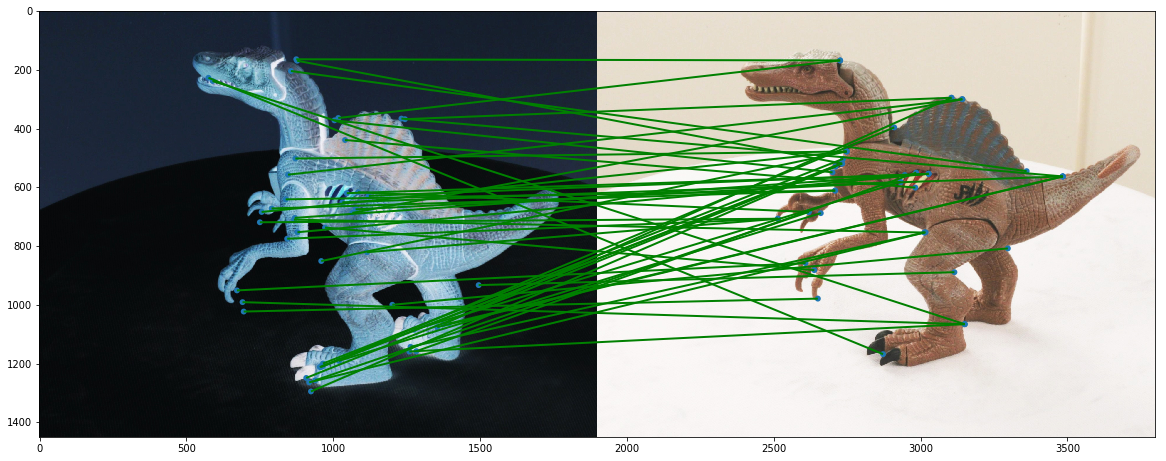

In [584]:
resized_dino1 = im.imresize(dino1, (1450, 1900))
draw_correspondence(resized_dino1, dino2, dino1_pairs, dino2_pairs)

In [567]:
print(dino1_pairs)
print()
print(dino2_pairs)
#thresh = 400, ratio = 0.75, patch = 35

[[924, 1295], [908, 1249], [1201, 1000], [695, 1023], [1495, 933], [1046, 620], [1121, 629]]

[[926, 1164], [926, 1164], [1397, 808], [750, 979], [1397, 808], [1046, 558], [1127, 554]]


In [572]:
print(dino1_pairs)
print()
print(dino2_pairs)
#thresh = 100, ratio = 0.6, patch = 9

[[877, 169], [874, 164], [871, 502], [695, 1023], [958, 1212], [866, 710], [869, 704], [1259, 1159], [856, 204], [918, 1264], [750, 719], [1121, 629], [1017, 364]]

[[833, 519], [826, 168], [848, 478], [750, 979], [833, 519], [1113, 754], [1127, 554], [705, 915], [1461, 545], [970, 1198], [614, 707], [1127, 554], [826, 168]]


In [585]:
print(dino1_pairs)
print()
print(dino2_pairs)
#thresh = 400, ratio = 1, patch = 15

[[972, 737], [924, 1295], [908, 1249], [877, 169], [1274, 1085], [874, 164], [1076, 675], [1201, 1000], [871, 502], [1019, 1191], [695, 1023], [1040, 439], [1393, 1064], [1354, 1076], [878, 753], [1495, 933], [1031, 651], [965, 1200], [958, 1212], [846, 557], [964, 1209], [954, 1212], [866, 710], [869, 704], [1259, 1159], [575, 227], [1046, 620], [959, 851], [756, 684], [790, 672], [1232, 366], [1375, 1066], [856, 204], [1004, 372], [918, 1264], [672, 951], [750, 719], [939, 1257], [1121, 629], [1263, 1143], [691, 991], [838, 641], [1283, 1158], [1017, 364], [843, 775], [1115, 821], [1084, 617], [1244, 368], [1065, 687], [589, 238]]

[[738, 882], [810, 529], [810, 529], [833, 519], [1032, 582], [826, 168], [1032, 582], [1397, 808], [848, 478], [760, 688], [750, 979], [1082, 601], [1584, 563], [1584, 563], [1127, 554], [1215, 889], [1584, 563], [836, 503], [833, 519], [1242, 300], [1010, 396], [830, 519], [1113, 754], [1127, 554], [1250, 1066], [972, 1168], [1046, 558], [848, 478], [848

# 3: Estimating the Fundamental Matrix

## Functions for part 3

In [562]:
#function to homogenze correspondence points:
def homogenize_points(my_points):
    
    #initialize output array
    out = []
    
    #loop through points, and add 1s to the end of each one to homogenize:
    for point in my_points:
        new_point = []
        for coord in point:
            new_point.append(int(coord))
        new_point.append(1)
        out.append(new_point)
        
    return out

#function to normalize non-homogenous points
def normalize_points(my_points):
    
    #initialize output array:
    norm = []
    
    #separate into x and y lists:
    xlist = [int(point[0]) for point in my_points]
    ylist = [int(point[1]) for point in my_points]
    
    #get average values of x and y lists:
    xav = sum(xlist)/len(xlist)
    yav = sum(ylist)/len(ylist)
    
    #get variance of x and y lists
    xvar = np.var(xlist)
    yvar = np.var(ylist)
    
    #compute normalization factor
    s = math.sqrt(2 / (xvar + yvar))
    
    #compute normalization matrix
    T = [[s, 0, -xav*s], \
        [0, s, -yav*s],\
        [0, 0, 1]]

    #homogenize input points:
    homos = homogenize_points(my_points)
    for point in homos:
        norm.append(np.matmul(T, point))
    
    return norm, T
    
#create correspondence vectors:
def correspondence_vector(p1, p2):
    
    #initialize output vector:
    vec = []
    
    #create correspondence vector:
    for x in p1:
        for y in p2:
            vec.append(y*x)
    return vec

#create correspondence matrix:
#take in homogenized points as input
def correspondence_matrix(img1_points, img2_points):
    
    #initialize output matrix:
    A = []
    
    #for each point, create a correspondence vector and put it in A:
    for i in range(len(img1_points)):
        A.append(correspondence_vector(img1_points[i], img2_points[i]))
    
    return A

#estimate the fundamental matrix:
#input correspondence points from img1 and img2
def estimate_fundamental(corr1, corr2):
    
    #normalize input points:
    norm_corr1, t1 = normalize_points(corr1)
    norm_corr2, t2 = normalize_points(corr2)
 
    #create correspondence matrix:
    A = correspondence_matrix(norm_corr2, norm_corr1)
    
    #apply singular value decomposition to A:
    u,s,v = np.linalg.svd(A, full_matrices = True)
    
    #fundamental matrix as a vector is the last row of v:
    f_vector = v[-1]
    
    #reshape f to a 3 x 3 matrix:
    F = np.reshape(f_vector, (3,3))
    
    #enforce the rank 2 constraint
    U,S,V = np.linalg.svd(F, full_matrices = True)
    
    S[-1] = 0
    S = np.diag(S)
    
    rank2_F = np.matmul(np.matmul(U,S), V)
    
    #de-normalize fundamental:
    return np.matmul(np.matmul(np.transpose(t2), rank2_F), t1)

#get epipolar lines
def plot_epipolar_lines(img1, img2, my_points, fundie):
    
    #compute lines:
    lines = [np.matmul(fundie, point) for point in homogenize_points(my_points)]
    draw_lines(img1, homogenize_points(my_points), img2, lines)
    

In [563]:
#run estimate_fundamental on given correspondences
e = estimate_fundamental(cor1, cor2)
for row in e:
    print(row)

[ -2.99362331e-07   1.99512882e-06  -1.06351892e-03]
[ -2.26686970e-06  -1.02718720e-08   4.82139315e-03]
[ 0.00208791 -0.00441313 -0.67442668]


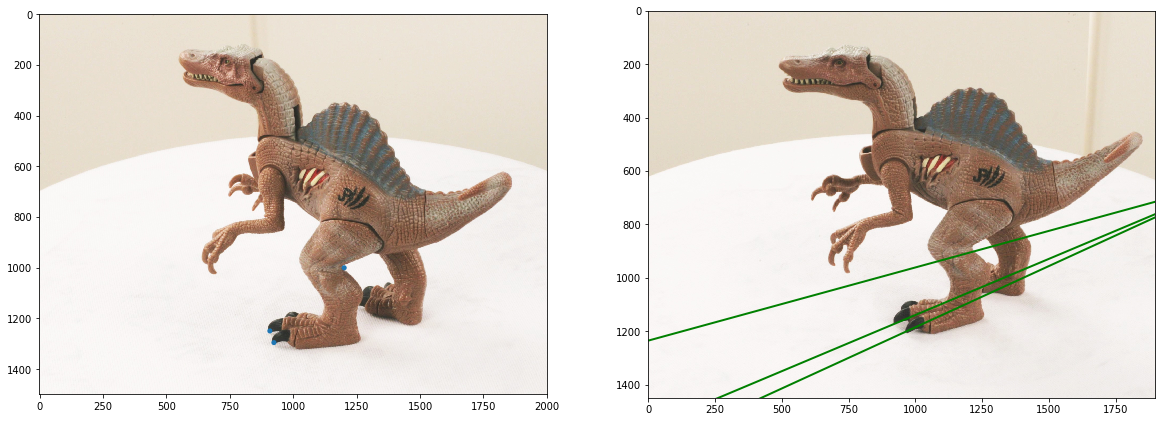

In [565]:
plot_epipolar_lines(dino1, dino2, dino1_pairs[:3], e)

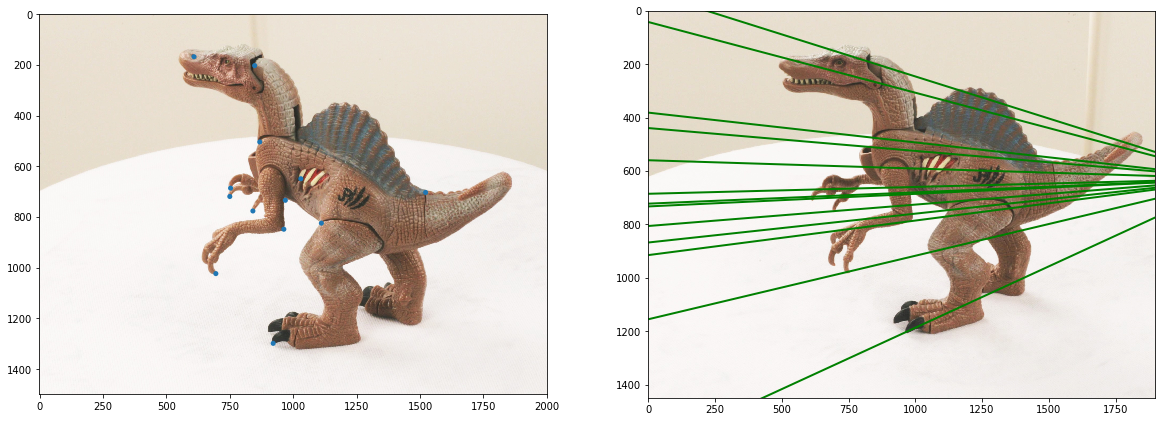

In [566]:
plot_epipolar_lines(dino1, dino2, cor1, e)